# Exercise 1 

Take the original Python script and find the line where the data is scaled. Comment it and perform again the PCA analysis. Is there any consequence? Replot and analyze. How much variance is capture now by PC1 and PC2? Do you still see the quasars separation in the scores plot?

SDSS dataset loaded successfully and parsed correctly!

Dataset Shape: (10000, 14)

Columns: Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'specobjid', 'class', 'redshift'],
      dtype='object')

Number of samples for each class:
class
GALAXY    5516
STAR      3491
QSO        993
Name: count, dtype: int64

Data has been standardized.

Variance explained by PC1: 90.35%
Variance explained by PC2: 8.58%
Total variance explained: 98.93%


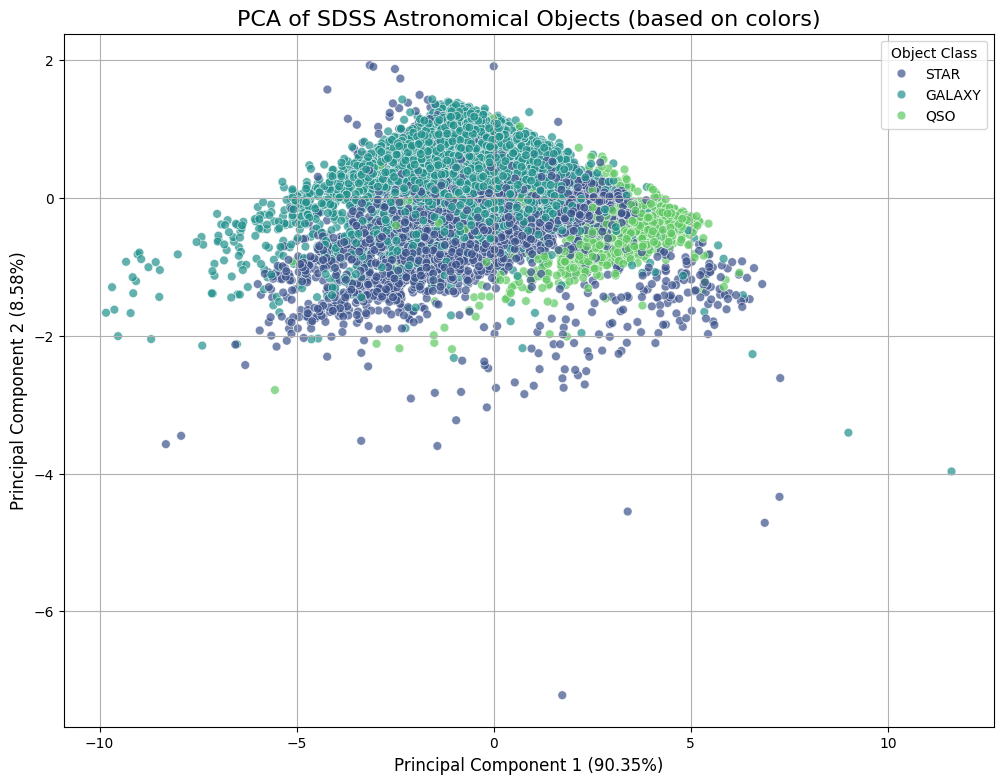

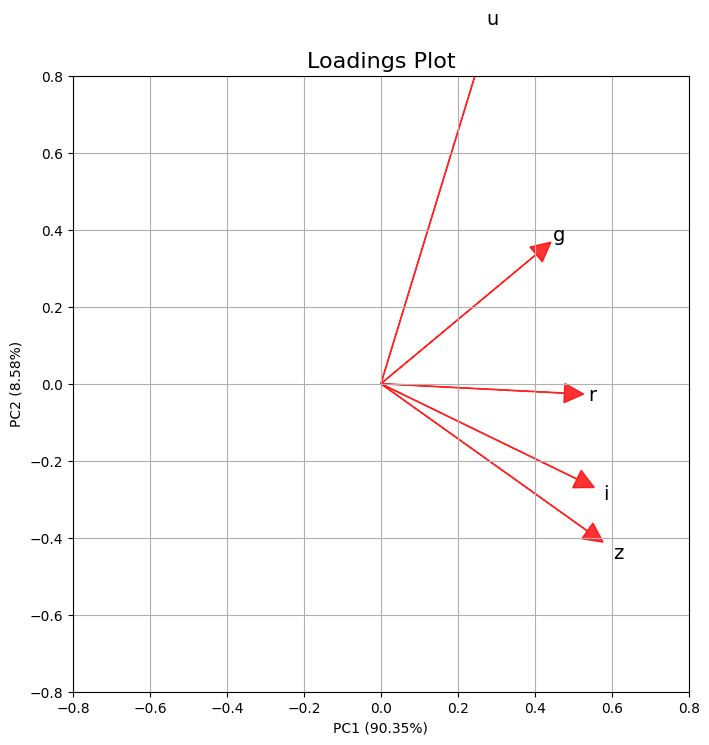

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- 1. DATA ACQUISITION ---
# Load the data from the CSV file you downloaded from the SDSS SkyServer.
#file_path = 'SDSS_DR14.csv' # Or whatever you named the downloaded file
file_path = 'https://drive.usercontent.google.com/download?id=1ZLnCVim0P1Ktewyhd1VcRNWTDCte-W0O&export=download&authuser=1' # Or whatever you named the downloaded file
# url = "https://drive.google.com/file/d/1ZLnCVim0P1Ktewyhd1VcRNWTDCte-W0O/view?usp=drive_link"

try:
    # Use skiprows=1 to ignore the first line ("#Table1")
    sdss_df = pd.read_csv(file_path, skiprows=1)
    print("SDSS dataset loaded successfully and parsed correctly!")

except FileNotFoundError:
    print(f"File not found: '{file_path}'. Please make sure you have downloaded the data and placed it in the correct directory.")
    sdss_df = pd.DataFrame()

# Proceed only if the DataFrame was loaded successfully
if not sdss_df.empty:
    # --- 2. DATA EXPLORATION AND PREPARATION ---
    print("\nDataset Shape:", sdss_df.shape)
    print("\nColumns:", sdss_df.columns)

    # Define our features and the target variable for coloring the plot
    features = ['u', 'g', 'r', 'i', 'z']
    target = 'class'

    # --- Safety Check ---
    # Verify that all required columns exist in the DataFrame before proceeding.
    if target in sdss_df.columns and all(col in sdss_df.columns for col in features):
        
        X = sdss_df[features]
        y = sdss_df[target]

        print("\nNumber of samples for each class:")
        print(y.value_counts())

        # Standardize the feature data
        #X_scaled = StandardScaler().fit_transform(X)
        X_scaled = X
        print("\nData has been standardized.")

        # --- 3. APPLYING PCA ---
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        explained_variance = pca.explained_variance_ratio_
        print(f"\nVariance explained by PC1: {explained_variance[0]:.2%}")
        print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
        print(f"Total variance explained: {np.sum(explained_variance):.2%}")

        # --- 4. VISUALIZATION AND INTERPRETATION ---

        # Create a new DataFrame for easier plotting with seaborn
        pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
        pca_df['class'] = y.values # Add the class labels for coloring

        # --- PLOT 1: SCORES PLOT (COLORED) ---
        # Scores mean the data is plotted on the new coordinate system : PC1xPC2
        plt.figure(figsize=(12, 9))
        sns.scatterplot(
            x='PC1', y='PC2',
            hue='class',
            data=pca_df,
            palette='viridis',
            alpha=0.7,
            s=40 # marker size
        )
        plt.title('PCA of SDSS Astronomical Objects (based on colors)', fontsize=16)
        plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%})', fontsize=12)
        plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%})', fontsize=12)
        plt.legend(title='Object Class')
        plt.grid(True)
        plt.show()

        # --- PLOT 2: LOADINGS PLOT ---
        plt.figure(figsize=(10, 8))
        # In scikit-learn, pca.components_ are the loadings. We transpose for easier plotting.
        loadings = pca.components_.T
        
        for i, feature in enumerate(features):
            plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, color='red', alpha=0.8)
            plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, color='black', ha='center', va='center', fontsize=14)

        plt.xlim(-0.8, 0.8)
        plt.ylim(-0.8, 0.8)
        plt.xlabel(f'PC1 ({explained_variance[0]:.2%})')
        plt.ylabel(f'PC2 ({explained_variance[1]:.2%})')
        plt.title('Loadings Plot', fontsize=16)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid()
        plt.show()

    else:
        print("\n--- ERROR ---")
        print(f"The target column '{target}' or one of the feature columns was not found in the data.")
        print("Please ensure your downloaded file contains all necessary columns.")
        print("Required columns: 'u', 'g', 'r', 'i', 'z', 'class'")

# Analisis

Se encontro una disminucion en el porcentaje de covarianza explicado por PC2 y un aumento de porcentaje de covarianza explicado por la componente PC1, sin embargo ¿Esto que significa ?
Buscando en "https://stats.stackexchange.com/questions/22329/how-does-centering-the-data-get-rid-of-the-intercept-in-regression-and-pca" Encontramos una posible explicacion si tus datos no están centrados (es decir, no se les ha restado la media a cada variable), el “centro de masa” del conjunto de puntos no está en el origen. Como consecuencia, el primer componente principal puede atravesar la nube de puntos de una manera que no coincide con la verdadera dirección de mayor variabilidad de los datos.Esto coincide con el hecho de quela matriz $\frac{1}{n-1}\sum (x^T \cdot x) no coincie con la matriz de covarianza si x no esta centrado 